# Types of Data
In data science, we study data in general. In order to do so, we must understand the various forms that data come in.

# Numeric Data
## Continuous
Continuous data can take on any value, although the range of values can be bounded. Values sampled from a normal distribution (a.k.a. Gaussian distribution) are an example. In practice, annual income should be treated as continuous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Draw 10000 samples from a normal distribution
values = np.random.randn((10000))

print('first 25 values from continuous data: \n')
print(values[:24])
plt.title('Histogram of continous data');
plt.hist(values, bins=25);

first 25 values from continuous data: 

[-0.9477227   0.47100969 -0.00932846 -1.19656038 -0.46597415  0.1880116
 -0.57708954 -1.31737407  0.6510453   1.03852547 -0.41474378  0.158305
  0.32556147  0.22829443  2.18620486 -0.6138462   1.3954036   0.70899222
 -1.0931468   0.54374771  0.54710339  1.32312221  1.24756014  0.9662211 ]


The above values are an example of continuous data. In this case, the data has a mean value of zero and a standard deviation of one. We know this because we generated this data from a known prior distribution.

## Discrete Data
Discrete can take on any one of a set of values (though the set can be infinite). By far the most common example is any data that comes in integers. The age (in years) of a human is a great example.

A randomly generated set of human ages (discrete variable): 

[58 20 67 33 40 93 84 48 30 81 68 28 67 30 33 88 36 39 44 81 32 71 43 55]


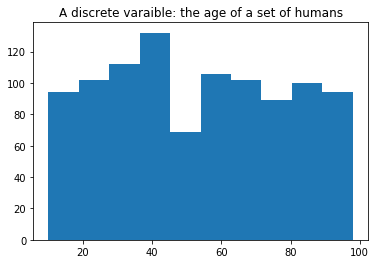

In [2]:
ages = np.random.randint(10, 99, (1000))
print("A randomly generated set of human ages (discrete variable): \n")
print(ages[:24])
plt.title("A discrete varaible: the age of a set of humans")
plt.hist(ages);

In reality, most data are discrete; however, as the total number of possible values that a column can take becomes very big, it is more practical to treat such variables as continuous.<br>

## Ranked Data
Ranked data is similar to discrete, but it is uniquely ordered: every example or row from a ranked column has a specific order, and values cannot be shared. An example of ranked data is the places in a race. There is a winner, second place, third place, etc.<br>
In the race example, consider a tie: two competitors tie for first place. They may both be listed as first, but the next racer still takes third place, not second. Thus, one of the "first place" competitors acts as a "placeholder" for the position of second in the ranked column that is race position.

## Similarity Between Discrete, Continuous and Ranked Data
Discrete and continuous data share a number of common traits. Both data types have a sensible order; that is, it makes sense to say that one value "is greater than" another, or that one value "is less than" another. Data with this property is sometimes lumped into the broader category of "numeric data."
# Qualitative Data
## Categorical Data
Categorial data describes some quality of an example. The color of a car is a categorical variable.

In [3]:
import pandas as pd

car_colors = ['black', 'red', 'blue', 'green', 'gold', 'silver', 'white']
cars = pd.DataFrame(columns=['item_type', 'color'])

cars['color'] = [np.random.choice(car_colors) for x in range(100)]
cars['item_type'] = 'car'
cars.head()

,item_type,color
0,car,blue
1,car,blue
2,car,black
3,car,white
4,car,black


## Non-numeric Property
Categorical data are non-numeric, meaning that there is no intrinsic logical ordering of categories. In practice, we often <b>enumerate</b> categories:

In [4]:
for i, color in enumerate(car_colors):
    print(i, ': ', color)

0 :  black
1 :  red
2 :  blue
3 :  green
4 :  gold
5 :  silver
6 :  white


We do this for computational convenience. Despite the above enumeration, there's no objective reason to say "red" > "black". This is the non-numeric property of categorical data.

# Structured vs. Unstructured Data
When we talk about structured data, it is understood that the data has a <b>fixed set of features</b> or <b>data</b>. Most tables (.csv files, sql tables, etc.) contain structured data. For example, a customer in a company database will have a set of fixed features: last purchase date, age, annual revenue, nationality, etc. Each column of a structured dataset has a specific meaning.<br><br>
Unstructured data are data whose values do not have specific meaning. A classical example is the pixel values of an image. Although all of the pixels contained in an image may depict a photograph taken of a dog, the color value of any individual pixel do not carry the same meaning as, say, the date the photo was taken.<br><br>
## Unstructured Data Example: An Image
Consider the following image:

A set of pixel values: 

[[[145 204 220]
  [147 206 222]
  [146 205 221]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   0   0]]

 [[146 205 221]
  [147 206 222]
  [146 205 221]
  ...
  [  1   1   1]
  [  1   1   1]
  [  2   0   1]]

 [[146 205 221]
  [146 205 221]
  [144 203 219]
  ...
  [  0   0   0]
  [  0   0   0]
  [  1   0   0]]

 ...

 [[ 44  39  46]
  [ 57  50  53]
  [ 70  63  63]
  ...
  [ 33  14   8]
  [ 30   8   3]
  [ 35  11   3]]

 [[ 42  39  44]
  [ 64  61  62]
  [ 78  75  74]
  ...
  [ 63  56  49]
  [ 56  48  40]
  [ 62  49  38]]

 [[  6   4   8]
  [ 12  12  12]
  [ 21  22  19]
  ...
  [ 80  78  73]
  [ 72  69  62]
  [ 76  68  59]]]


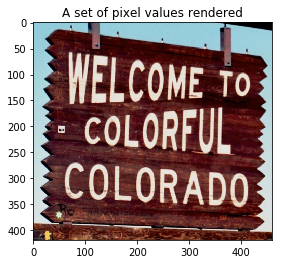

In [5]:
from PIL import Image

#load image using Python Image Library
image = Image.open('./Intro_ML/images/colorful_colorado.png')
#Remove transparent channel
as_array = np.array(image)[:, :, :3]
print('A set of pixel values: \n')
print(as_array)
plt.title('A set of pixel values rendered')
plt.imshow(as_array);

The combination of pixel values creates a legible sign. However, if we change any of those values, or all of them, there may be little apparent difference:

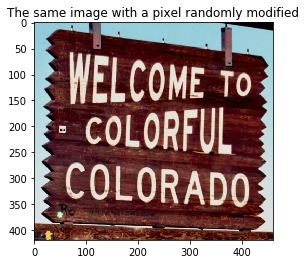

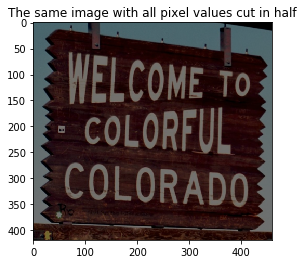

In [6]:
#set pixel 123, 123 to a random RGB value
as_array[123, 123, :] = np.random.randint(0, 255, (3))
plt.title("The same image with a pixel randomly modified")
plt.imshow(as_array)
plt.show();
#divide each pixel value by two
half_array = as_array // 2
plt.title('The same image with all pixel values cut in half')
plt.imshow(half_array);

We see that changing one of the pixel values has little (if any) visible effect on the image. Even halving each pixel value still leaves the subject of the image intact.<br><br>
Images are not the only example of unstructured data. Other examples may include audio recordings, videos, output from a particle detector, or output from some other scientific instruments.
## Stuctured Data Example: Customer Churn Data
The following is a customer churn dataset. This is an example of a structured dataset. Each customer has a row, and each column has a specific meaning.

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Intro_ML/datasets/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exercise: Idenfity the Types of Data
Answer the following questions:<br>
1. What type of data are pixel values (continuous, discrete, ranked, or categorical)?
2. For each of the columns in the customer churn dataset, identify what type of data are present (continuous, discrete, ranked, or categorical). 

If you are unsure about a field, discuss it with a neighbor or ask for help!